In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import glob
import plotly.express as px

import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None

data = pd.concat(map(pd.read_excel, ['content\\rollingsales_bronx.xlsx', 'content\\rollingsales_brooklyn.xlsx',
                      'content\\rollingsales_manhattan.xlsx','content\\rollingsales_queens.xlsx'
                      , 'content\\rollingsales_statenisland.xlsx']), ignore_index=True )
data

BOROUGH NEIGHBORHOOD     BUILDING CLASS CATEGORY TAX CLASS AT PRESENT  \
0            2     BATHGATE     01 ONE FAMILY DWELLINGS                    1   
1            2     BATHGATE     01 ONE FAMILY DWELLINGS                    1   
2            2     BATHGATE     01 ONE FAMILY DWELLINGS                    1   
3            2     BATHGATE     01 ONE FAMILY DWELLINGS                    1   
4            2     BATHGATE     02 TWO FAMILY DWELLINGS                    1   
...        ...          ...                         ...                  ...   
73300        5      WOODROW  05 TAX CLASS 1 VACANT LAND                    1   
73301        5      WOODROW  05 TAX CLASS 1 VACANT LAND                    1   
73302        5      WOODROW  05 TAX CLASS 1 VACANT LAND                   1B   
73303        5      WOODROW  05 TAX CLASS 1 VACANT LAND                   1B   
73304        5      WOODROW          22 STORE BUILDINGS                    4   

       BLOCK  LOT  EASEMENT BUILDING CLASS AT PRESENT                ADDRESS  \
0       3028   24       NaN                        A1  410 EAST 179TH STREET   
1       3030   66       NaN                        A1       4453 PARK AVENUE   
2       3030   66       NaN                        A1       4453 PARK AVENUE   
3       3035   52       NaN                        A1    461 EAST 178 STREET   
4       2904   22       NaN                        B9    454 EAST 172 STREET   
...      ...  ...       ...                       ...                    ...   
73300   6970   84       NaN                        A1     N/A LENEVAR AVENUE   
73301   6970   85       NaN                        A1     N/A LENEVAR AVENUE   
73302   6970   86       NaN                        V0     N/A LENEVAR AVENUE   
73303   6970   87       NaN                        V0      96 LENEVAR AVENUE   
73304   7144  510       NaN                        K2  3120 ARTHUR KILL ROAD   

      APARTMENT NUMBER  ...  RESIDENTIAL UNITS  COMMERCIAL UNITS  TOTAL UNITS  \
0                  NaN  ...                1.0               0.0          1.0   
1                  NaN  ...                1.0               0.0          1.0   
2                  NaN  ...                1.0               0.0          1.0   
3                  NaN  ...                1.0               0.0          1.0   
4                  NaN  ...                2.0               0.0          2.0   
...                ...  ...                ...               ...          ...   
73300              NaN  ...                1.0               0.0          1.0   
73301              NaN  ...                1.0               0.0          1.0   
73302              NaN  ...                0.0               0.0          0.0   
73303              NaN  ...                0.0               0.0          0.0   
73304              NaN  ...                0.0               1.0          1.0   

       LAND SQUARE FEET  GROSS SQUARE FEET  YEAR BUILT  \
0                1842.0             2048.0      1901.0   
1                1646.0             1497.0      1899.0   
2                1646.0             1497.0      1899.0   
3                1782.0             1548.0      1899.0   
4                1658.0             1428.0      1901.0   
...                 ...                ...         ...   
73300            2603.0                0.0      2022.0   
73301            2551.0                0.0         NaN   
73302            2597.0                0.0      2023.0   
73303            2644.0                0.0      2023.0   
73304           98116.0             7795.0      1977.0   

       TAX CLASS AT TIME OF SALE  BUILDING CLASS AT TIME OF SALE SALE PRICE  \
0                              1                              A1     655000   
1                              1                              A1     215000   
2                              1                              A1     570000   
3                              1                              A1          0   
4                   

In [3]:
data.isnull().sum()

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                 65
BLOCK                                 0
LOT                                   0
EASEMENT                          73305
BUILDING CLASS AT PRESENT            65
ADDRESS                               0
APARTMENT NUMBER                  55608
ZIP CODE                              5
RESIDENTIAL UNITS                 17833
COMMERCIAL UNITS                  31037
TOTAL UNITS                       15504
LAND SQUARE FEET                  33366
GROSS SQUARE FEET                 33366
YEAR BUILT                         4875
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                            0
SALE DATE                             0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73305 entries, 0 to 73304
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         73305 non-null  int64         
 1   NEIGHBORHOOD                    73305 non-null  object        
 2   BUILDING CLASS CATEGORY         73305 non-null  object        
 3   TAX CLASS AT PRESENT            73240 non-null  object        
 4   BLOCK                           73305 non-null  int64         
 5   LOT                             73305 non-null  int64         
 6   EASEMENT                        0 non-null      float64       
 7   BUILDING CLASS AT PRESENT       73240 non-null  object        
 8   ADDRESS                         73305 non-null  object        
 9   APARTMENT NUMBER                17697 non-null  object        
 10  ZIP CODE                        73300 non-null  float64       
 11  RE

In [5]:
data_upgraded = data.drop(columns=['LOT', 'EASEMENT', 'APARTMENT NUMBER', 'BLOCK', 'ZIP CODE'])  # Видалення стовпців
#BOROUGH
data_upgraded.loc[data_upgraded["BOROUGH"] == 1, "BOROUGH"] = "Manhattan"
data_upgraded.loc[data_upgraded["BOROUGH"] == 2, "BOROUGH"] = "Bronx"
data_upgraded.loc[data_upgraded["BOROUGH"] == 4, "BOROUGH"] = "Queens"
data_upgraded.loc[data_upgraded["BOROUGH"] == 3, "BOROUGH"] = "Brooklyn"
data_upgraded.loc[data_upgraded["BOROUGH"] == 5, "BOROUGH"] = "Staten Island"
#TAX CLASS AT PRESENT

#BUILDING CLASS AT PRESENT
data_upgraded.loc[data_upgraded["BUILDING CLASS AT PRESENT"].isnull(), "BUILDING CLASS AT PRESENT"] = "UNKNOWN BUILDING CLASS AT PRESENT"
data_upgraded.loc[data_upgraded["BUILDING CLASS AT PRESENT"]=='', "BUILDING CLASS AT PRESENT"] = "UNKNOWN BUILDING CLASS AT PRESENT"
data_upgraded.loc[data_upgraded["BUILDING CLASS AT PRESENT"]==0, "BUILDING CLASS AT PRESENT"] = "UNKNOWN BUILDING CLASS AT PRESENT"
#RESIDENTIAL UNITS
data_upgraded.loc[data_upgraded["RESIDENTIAL UNITS"].isnull(), "RESIDENTIAL UNITS"] = "NO RESIDENTIAL UNITS"
data_upgraded.loc[data_upgraded["RESIDENTIAL UNITS"]=='', "RESIDENTIAL UNITS"] = "NO RESIDENTIAL UNITS"
data_upgraded.loc[data_upgraded["RESIDENTIAL UNITS"]==0, "RESIDENTIAL UNITS"] = "NO RESIDENTIAL UNITS"
#COMMERCIAL UNITS
data_upgraded.loc[data_upgraded["COMMERCIAL UNITS"].isnull(), "COMMERCIAL UNITS"] = "NO COMMERCIAL UNITS"
data_upgraded.loc[data_upgraded["COMMERCIAL UNITS"]=='', "COMMERCIAL UNITS"] = "NO COMMERCIAL UNITS"
data_upgraded.loc[data_upgraded["COMMERCIAL UNITS"]==0, "COMMERCIAL UNITS"] = "NO COMMERCIAL UNITS"
#TOTAL UNITS
data_upgraded.loc[data_upgraded["TOTAL UNITS"].isnull(), "TOTAL UNITS"] = "NO TOTAL UNITS"
data_upgraded.loc[data_upgraded["TOTAL UNITS"]=='', "TOTAL UNITS"] = "NO TOTAL UNITS"
data_upgraded.loc[data_upgraded["TOTAL UNITS"]==0, "TOTAL UNITS"] = "NO TOTAL UNITS"
#LAND SQUARE FEET
data_upgraded.loc[data_upgraded["LAND SQUARE FEET"].isnull(), "LAND SQUARE FEET"] = "UNKNOWN LAND SQUARE FEET"
data_upgraded.loc[data_upgraded["LAND SQUARE FEET"]=='', "LAND SQUARE FEET"] = "UNKNOWN LAND SQUARE FEET"
data_upgraded.loc[data_upgraded["LAND SQUARE FEET"]==0, "LAND SQUARE FEET"] = "UNKNOWN LAND SQUARE FEET"
#GROSS SQUARE FEET
data_upgraded.loc[data_upgraded["GROSS SQUARE FEET"].isnull(), "GROSS SQUARE FEET"] = "UNKNOWN GROSS SQUARE FEET"
data_upgraded.loc[data_upgraded["GROSS SQUARE FEET"]=='', "GROSS SQUARE FEET"] = "UNKNOWN GROSS SQUARE FEET"
data_upgraded.loc[data_upgraded["GROSS SQUARE FEET"]==0, "GROSS SQUARE FEET"] = "UNKNOWN GROSS SQUARE FEET"
#YEAR BUILT

#TAX CLASS AT PRESENT
data_upgraded['TAX CLASS AT PRESENT'] = data_upgraded['TAX CLASS AT PRESENT'].str.strip()
#SALE DATE
data_upgraded['SALE DATE'] = pd.to_datetime(data_upgraded['SALE DATE'], format='%Y-%m-%d')

In [6]:
data_upgraded

BOROUGH NEIGHBORHOOD     BUILDING CLASS CATEGORY  \
0              Bronx     BATHGATE     01 ONE FAMILY DWELLINGS   
1              Bronx     BATHGATE     01 ONE FAMILY DWELLINGS   
2              Bronx     BATHGATE     01 ONE FAMILY DWELLINGS   
3              Bronx     BATHGATE     01 ONE FAMILY DWELLINGS   
4              Bronx     BATHGATE     02 TWO FAMILY DWELLINGS   
...              ...          ...                         ...   
73300  Staten Island      WOODROW  05 TAX CLASS 1 VACANT LAND   
73301  Staten Island      WOODROW  05 TAX CLASS 1 VACANT LAND   
73302  Staten Island      WOODROW  05 TAX CLASS 1 VACANT LAND   
73303  Staten Island      WOODROW  05 TAX CLASS 1 VACANT LAND   
73304  Staten Island      WOODROW          22 STORE BUILDINGS   

      TAX CLASS AT PRESENT BUILDING CLASS AT PRESENT                ADDRESS  \
0                        1                        A1  410 EAST 179TH STREET   
1                        1                        A1       4453 PARK AVENUE   
2                        1                        A1       4453 PARK AVENUE   
3                        1                        A1    461 EAST 178 STREET   
4                        1                        B9    454 EAST 172 STREET   
...                    ...                       ...                    ...   
73300                    1                        A1     N/A LENEVAR AVENUE   
73301                    1                        A1     N/A LENEVAR AVENUE   
73302                   1B                        V0     N/A LENEVAR AVENUE   
73303                   1B                        V0      96 LENEVAR AVENUE   
73304                    4                        K2  3120 ARTHUR KILL ROAD   

          RESIDENTIAL UNITS     COMMERCIAL UNITS     TOTAL UNITS  \
0                       1.0  NO COMMERCIAL UNITS             1.0   
1                       1.0  NO COMMERCIAL UNITS             1.0   
2                       1.0  NO COMMERCIAL UNITS             1.0   
3                       1.0  NO COMMERCIAL UNITS             1.0   
4                       2.0  NO COMMERCIAL UNITS             2.0   
...                     ...                  ...             ...   
73300                   1.0  NO COMMERCIAL UNITS             1.0   
73301                   1.0  NO COMMERCIAL UNITS             1.0   
73302  NO RESIDENTIAL UNITS  NO COMMERCIAL UNITS  NO TOTAL UNITS   
73303  NO RESIDENTIAL UNITS  NO COMMERCIAL UNITS  NO TOTAL UNITS   
73304  NO RESIDENTIAL UNITS                  1.0             1.0   

      LAND SQUARE FEET          GROSS SQUARE FEET  YEAR BUILT  \
0               1842.0                     2048.0      1901.0   
1               1646.0                     1497.0      1899.0   
2               1646.0                     1497.0      1899.0   
3               1782.0                     1548.0      1899.0   
4               1658.0                     1428.0      1901.0   
...                ...                        ...         ...   
73300           2603.0  UNKNOWN GROSS SQUARE FEET      2022.0   
73301           2551.0  UNKNOWN GROSS SQUARE FEET         NaN   
73302           2597.0  UNKNOWN GROSS SQUARE FEET      2023.0   
73303           2644.0  UNKNOWN GROSS SQUARE FEET      2023.0   
73304          98116.0                     7795.0      1977.0   

       TAX CLASS AT TIME OF SALE BUILDING CLASS AT TIME OF SALE  SALE PRICE  \
0                              1                             A1      655000   
1                              1                             A1      215000   
2                              1                             A1      570000   
3                              1                             A1           0   
4                              1                             B9      350000   
...                          ...                            ...         ...   
73300                          1                             V0     1116638   
73301                          1                     

In [7]:
data_upgraded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73305 entries, 0 to 73304
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         73305 non-null  object        
 1   NEIGHBORHOOD                    73305 non-null  object        
 2   BUILDING CLASS CATEGORY         73305 non-null  object        
 3   TAX CLASS AT PRESENT            73240 non-null  object        
 4   BUILDING CLASS AT PRESENT       73305 non-null  object        
 5   ADDRESS                         73305 non-null  object        
 6   RESIDENTIAL UNITS               73305 non-null  object        
 7   COMMERCIAL UNITS                73305 non-null  object        
 8   TOTAL UNITS                     73305 non-null  object        
 9   LAND SQUARE FEET                73305 non-null  object        
 10  GROSS SQUARE FEET               73305 non-null  object        
 11  YE

In [8]:
data_upgraded.groupby([data_upgraded["SALE DATE"].dt.year, data_upgraded["SALE DATE"].dt.month]).size()

SALE DATE  SALE DATE
2022       11           6653
           12           6741
2023       1            5511
           2            5363
           3            6875
           4            5729
           5            6721
           6            6938
           7            6052
           8            6946
           9            5680
           10           4096
dtype: int64

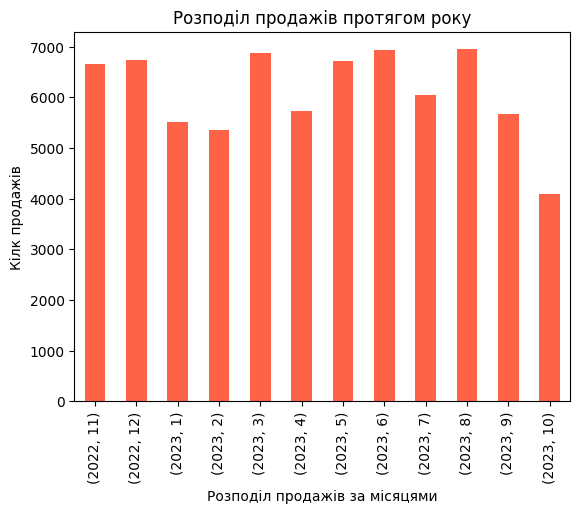

In [9]:
data_upgraded.groupby([data_upgraded["SALE DATE"].dt.year, data_upgraded["SALE DATE"].dt.month]).size().plot(kind="bar", legend='', color='tomato')
plt.title('Розподіл продажів протягом року')
plt.xlabel('Розподіл продажів за місяцями')
plt.ylabel('Кілк продажів')
plt.show()

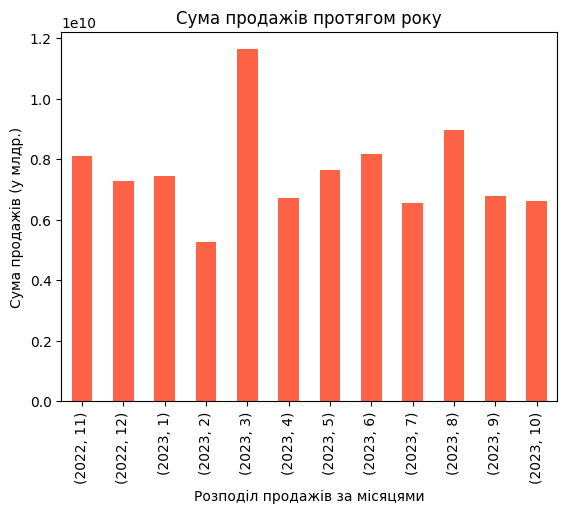

In [10]:
data_upgraded.groupby([data_upgraded["SALE DATE"].dt.year, data_upgraded["SALE DATE"].dt.month])["SALE PRICE"].sum().plot(kind="bar", legend='', color='tomato')
plt.title('Сума продажів протягом року')
plt.xlabel('Розподіл продажів за місяцями')
plt.ylabel('Сума продажів (у млдр.)')
plt.show()

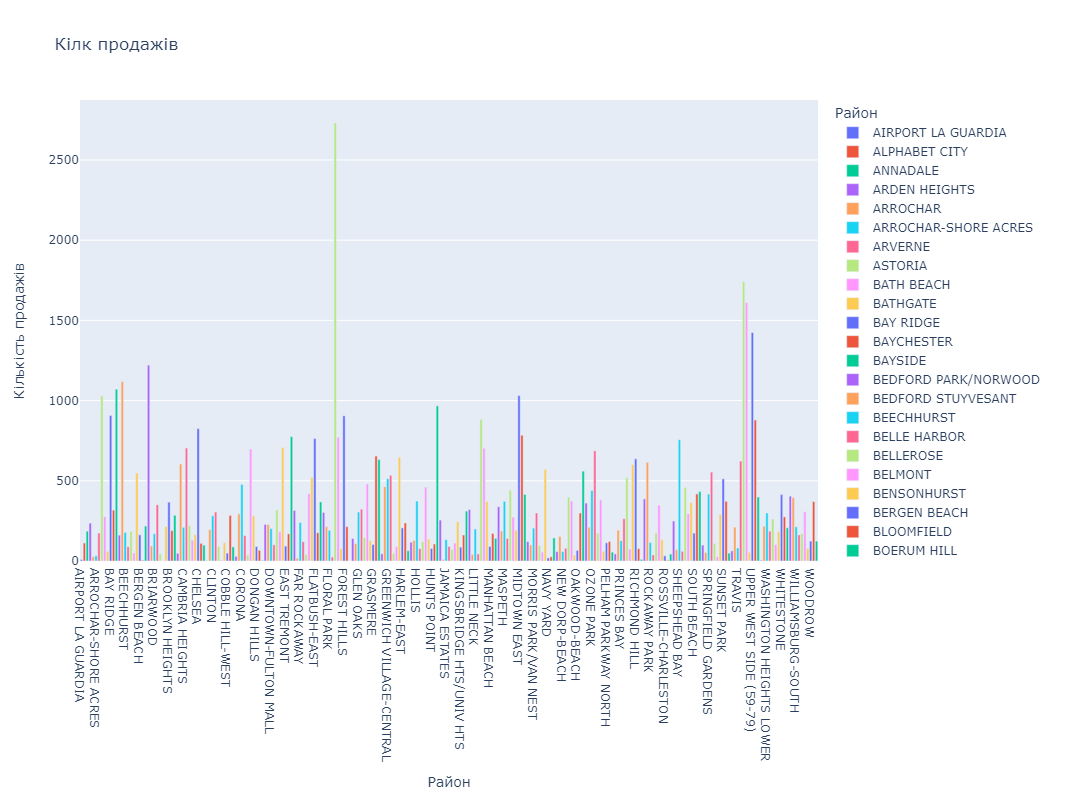

In [11]:
neighborhood_counts = data_upgraded.groupby(data_upgraded["NEIGHBORHOOD"]).size().reset_index(name="Sales Count")

fig = px.bar(neighborhood_counts, x="NEIGHBORHOOD", y="Sales Count", color="NEIGHBORHOOD",
             labels={"NEIGHBORHOOD": "Район", "Sales Count": "Кількість продажів"},
             title='Кілк продажів')

fig.update_layout(height=800, width=1200)

fig.show()

In [12]:
data_upgraded.groupby(data_upgraded["NEIGHBORHOOD"]).size()

NEIGHBORHOOD
AIRPORT LA GUARDIA      9
ALPHABET CITY         112
ANNADALE              186
ARDEN HEIGHTS         236
ARROCHAR               26
                     ... 
WOODHAVEN             307
WOODLAWN               78
WOODROW               124
WOODSIDE              370
WYCKOFF HEIGHTS       124
Length: 253, dtype: int64

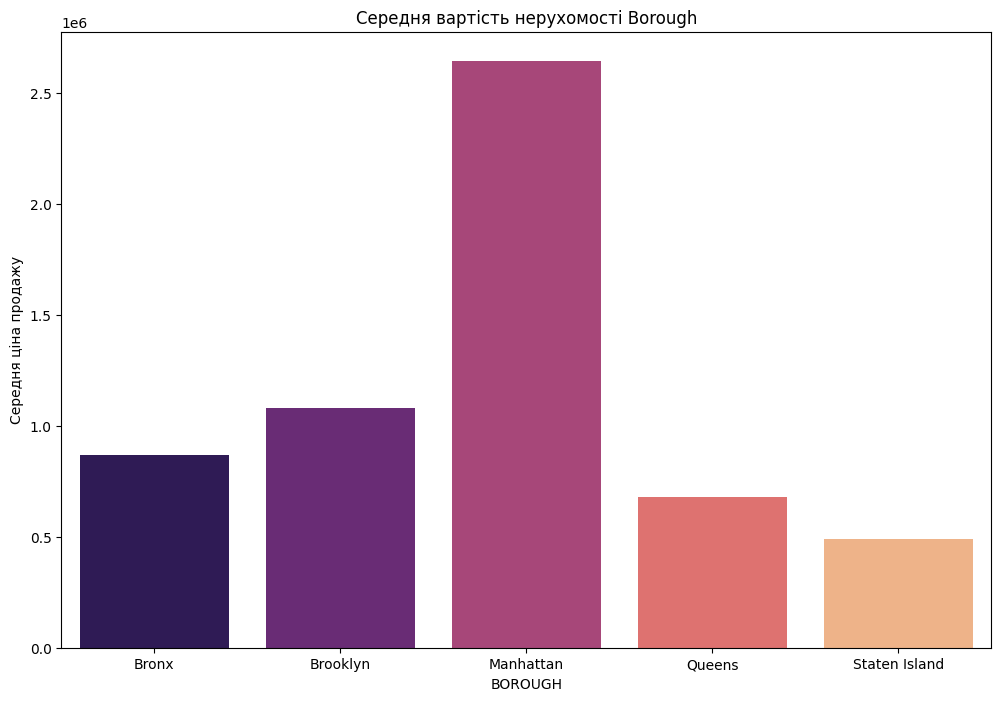

In [13]:
average_price_by_borough = data_upgraded.groupby('BOROUGH')['SALE PRICE'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='BOROUGH', y='SALE PRICE', data=average_price_by_borough, palette='magma')
plt.ylabel('Середня ціна продажу')
plt.title('Середня вартість нерухомості Borough')
plt.show()

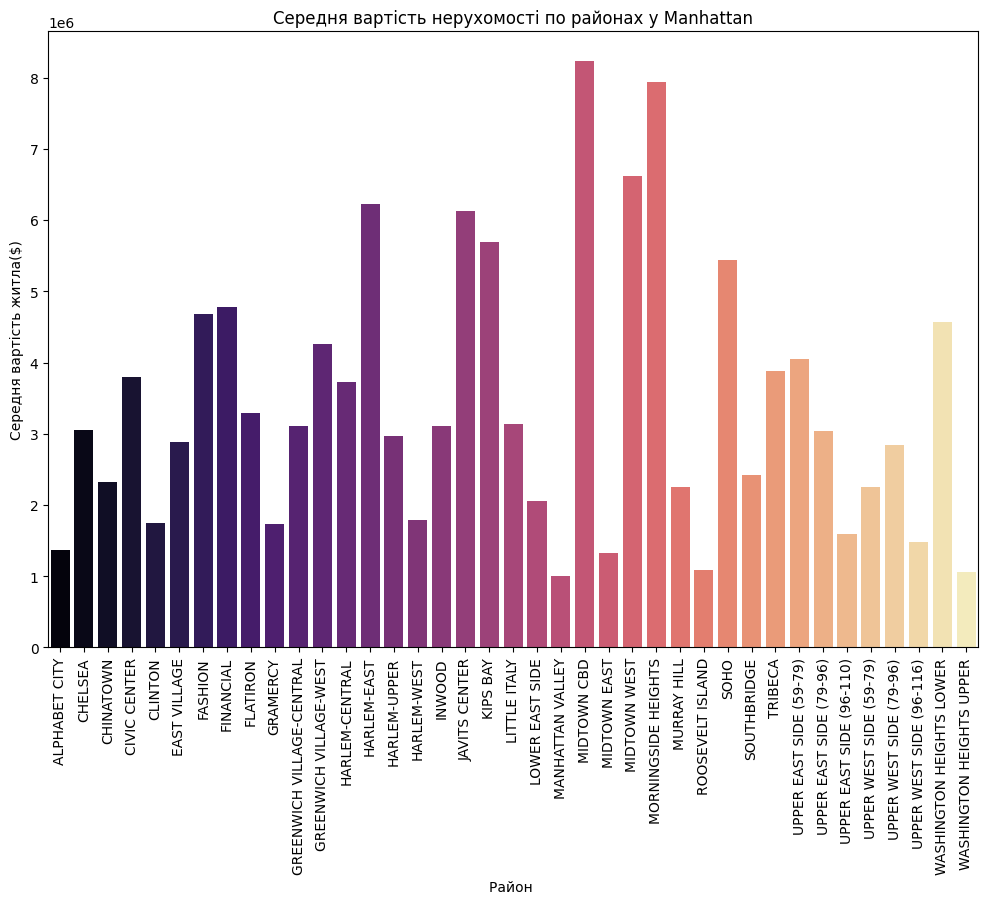

In [14]:
manhattan_about_data = data_upgraded[(data_upgraded['BOROUGH'] == 'Manhattan') & (data['SALE PRICE'] > 0)]

avg_price_manhattan = manhattan_about_data.groupby('NEIGHBORHOOD')['SALE PRICE'].mean()

plt.figure(figsize=(12, 8))
sns.barplot(x=avg_price_manhattan.index, y=avg_price_manhattan.values, palette='magma')
plt.title('Середня вартість нерухомості по районах у Manhattan')
plt.xlabel('Район ')
plt.ylabel('Середня вартість житла($)')
plt.xticks(rotation=90)
plt.show()

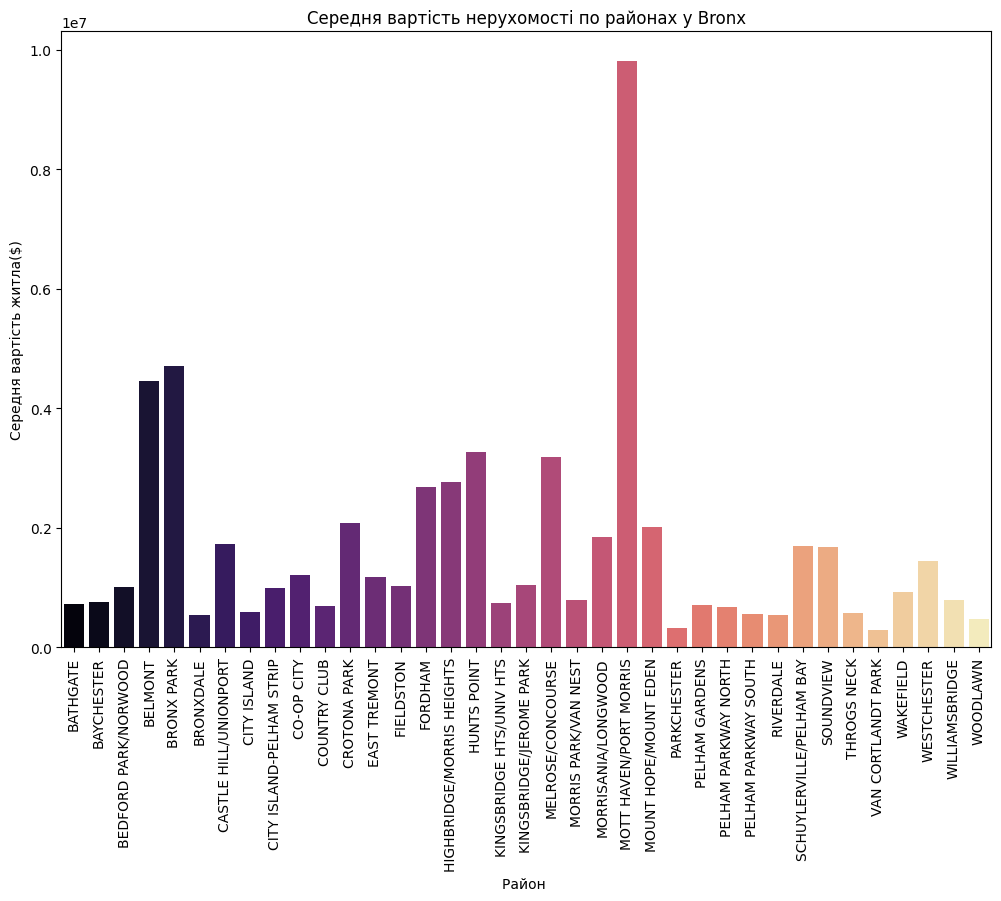

In [15]:
bronx_about_data = data_upgraded[(data_upgraded['BOROUGH'] == 'Bronx') & (data['SALE PRICE'] > 0)]

avg_price_bronx = bronx_about_data.groupby('NEIGHBORHOOD')['SALE PRICE'].mean()

plt.figure(figsize=(12, 8))
sns.barplot(x=avg_price_bronx.index, y=avg_price_bronx.values, palette='magma')
plt.title('Середня вартість нерухомості по районах у Bronx')
plt.xlabel('Район ')
plt.ylabel('Середня вартість житла($)')
plt.xticks(rotation=90)
plt.show()

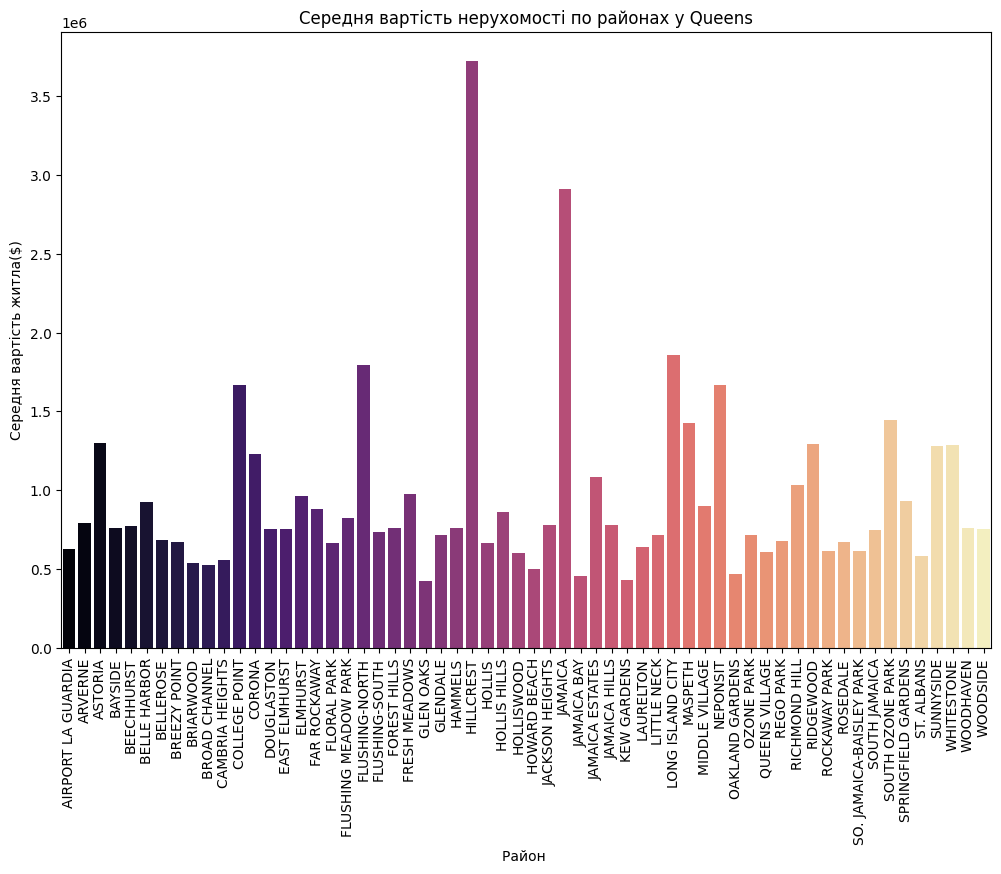

In [16]:
queens_about_data = data_upgraded[(data_upgraded['BOROUGH'] == 'Queens') & (data['SALE PRICE'] > 0)]

avg_price_queens = queens_about_data.groupby('NEIGHBORHOOD')['SALE PRICE'].mean()

plt.figure(figsize=(12, 8))
sns.barplot(x=avg_price_queens.index, y=avg_price_queens.values, palette='magma')
plt.title('Середня вартість нерухомості по районах у Queens')
plt.xlabel('Район ')
plt.ylabel('Середня вартість житла($)')
plt.xticks(rotation=90)
plt.show()

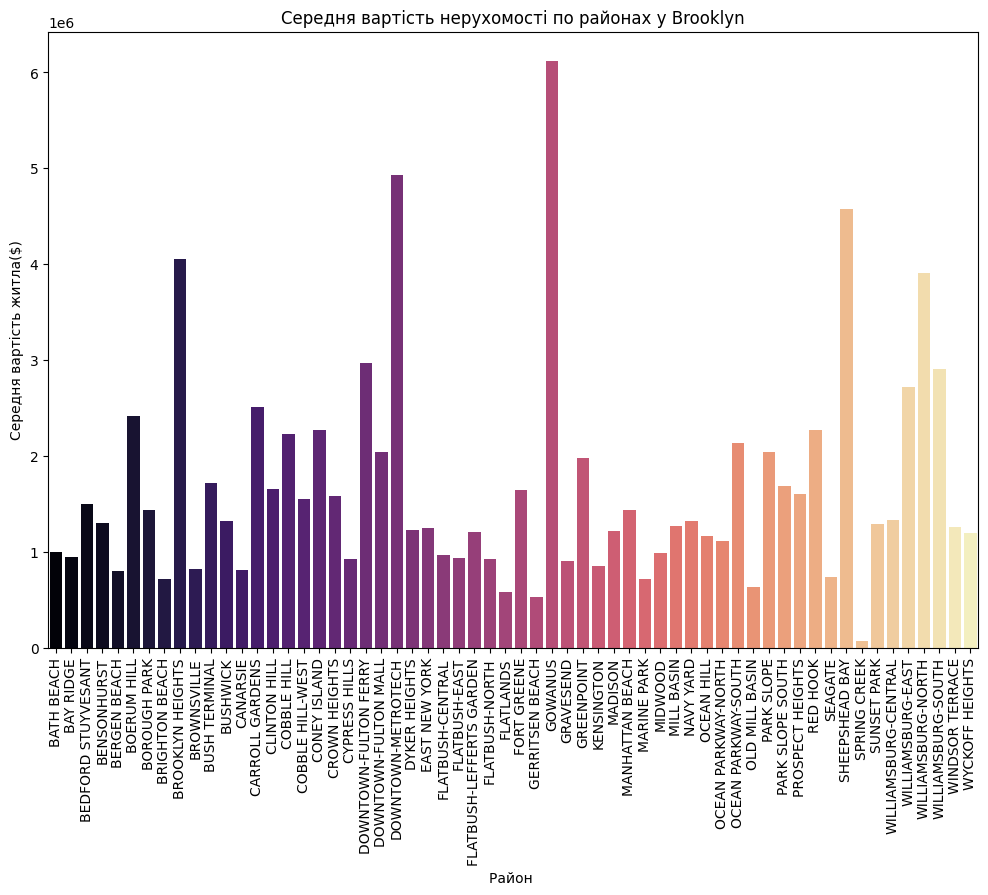

In [17]:
brooklyn_about_data = data_upgraded[(data_upgraded['BOROUGH'] == 'Brooklyn') & (data['SALE PRICE'] > 0)]

avg_price_brooklyn = brooklyn_about_data.groupby('NEIGHBORHOOD')['SALE PRICE'].mean()

plt.figure(figsize=(12, 8))
sns.barplot(x=avg_price_brooklyn.index, y=avg_price_brooklyn.values, palette='magma')
plt.title('Середня вартість нерухомості по районах у Brooklyn')
plt.xlabel('Район ')
plt.ylabel('Середня вартість житла($)')
plt.xticks(rotation=90)
plt.show()

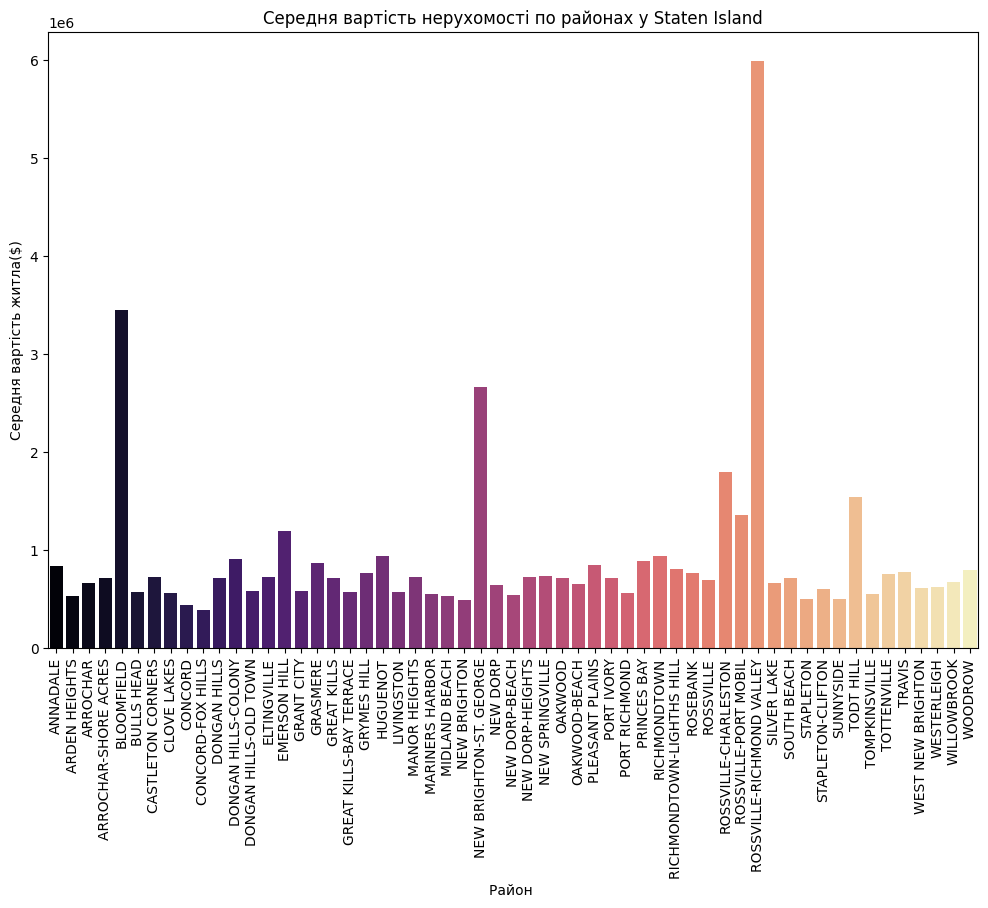

In [18]:
statenisland_about_data = data_upgraded[(data_upgraded['BOROUGH'] == 'Staten Island') & (data['SALE PRICE'] > 0)]

avg_price_statenisland = statenisland_about_data.groupby('NEIGHBORHOOD')['SALE PRICE'].mean()

plt.figure(figsize=(12, 8))
sns.barplot(x=avg_price_statenisland.index, y=avg_price_statenisland.values, palette='magma')
plt.title('Середня вартість нерухомості по районах у Staten Island')
plt.xlabel('Район ')
plt.ylabel('Середня вартість житла($)')
plt.xticks(rotation=90)
plt.show()

In [19]:
#min|max calculation
avg_price_manhattan = manhattan_about_data['SALE PRICE'].mean()
max_price_manhattan = manhattan_about_data['SALE PRICE'].max()

avg_price_bronx = bronx_about_data['SALE PRICE'].mean()
max_price_bronx = bronx_about_data['SALE PRICE'].max()

avg_price_queens = queens_about_data['SALE PRICE'].mean()
max_price_queens = queens_about_data['SALE PRICE'].max()

avg_price_brooklyn = brooklyn_about_data['SALE PRICE'].mean()
max_price_brooklyn = brooklyn_about_data['SALE PRICE'].max()

avg_price_statenisland = statenisland_about_data['SALE PRICE'].mean()
max_price_statenisland = statenisland_about_data['SALE PRICE'].max()

print(f"Середня вартість у Манхеттені: ${avg_price_manhattan:.2f}")
print(f"Максимальна вартість у Манхеттені: ${max_price_manhattan:.2f}")
print(f"Середня вартість у Бронксі: ${avg_price_bronx:.2f}")
print(f"Максимальна вартість у Бронксі: ${max_price_bronx:.2f}")
print(f"Середня вартість у Квінсі: ${avg_price_queens:.2f}")
print(f"Максимальна вартість у Квінсі: ${max_price_queens:.2f}")
print(f"Середня вартість у Брукліні: ${avg_price_brooklyn:.2f}")
print(f"Максимальна вартість у Брукліні: ${max_price_brooklyn:.2f}")
print(f"Середня вартість у Стейтен Айленді: ${avg_price_statenisland:.2f}")
print(f"Максимальна вартість у Стейтен Айленді: ${max_price_statenisland:.2f}")

Середня вартість у Манхеттені: $3318782.48
Максимальна вартість у Манхеттені: $598155755.00
Середня вартість у Бронксі: $1265141.58
Максимальна вартість у Бронксі: $103741935.00
Середня вартість у Квінсі: $1043871.86
Максимальна вартість у Квінсі: $124000000.00
Середня вартість у Брукліні: $1693246.56
Максимальна вартість у Брукліні: $160000000.00
Середня вартість у Стейтен Айленді: $751099.56
Максимальна вартість у Стейтен Айленді: $42000000.00


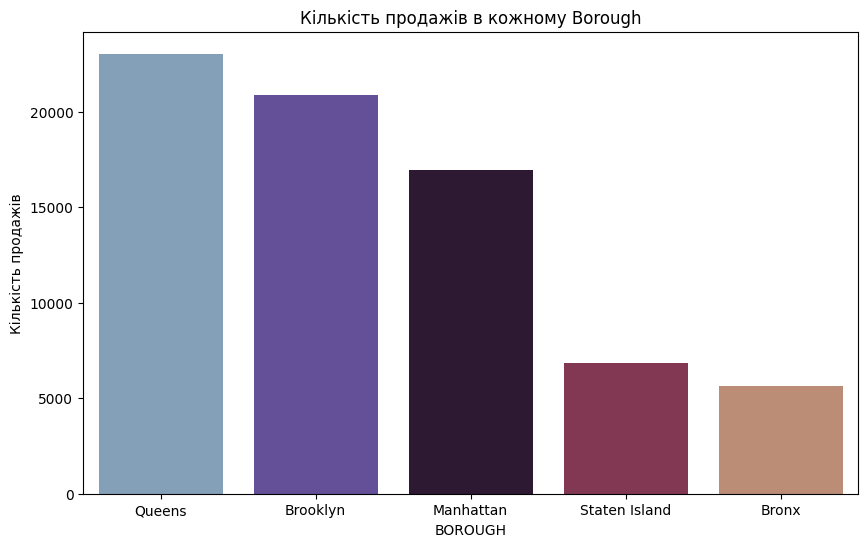

In [20]:
# Обсяг продажів
sales_by_borough = data_upgraded['BOROUGH'].value_counts().reset_index()
sales_by_borough.columns = ['BOROUGH', 'SALES COUNT']

# Побудова графіку
plt.figure(figsize=(10, 6))
sns.barplot(x='BOROUGH', y='SALES COUNT', data=sales_by_borough, palette='twilight')
plt.ylabel('Кількість продажів')
plt.title('Кількість продажів в кожному Borough')
plt.show()

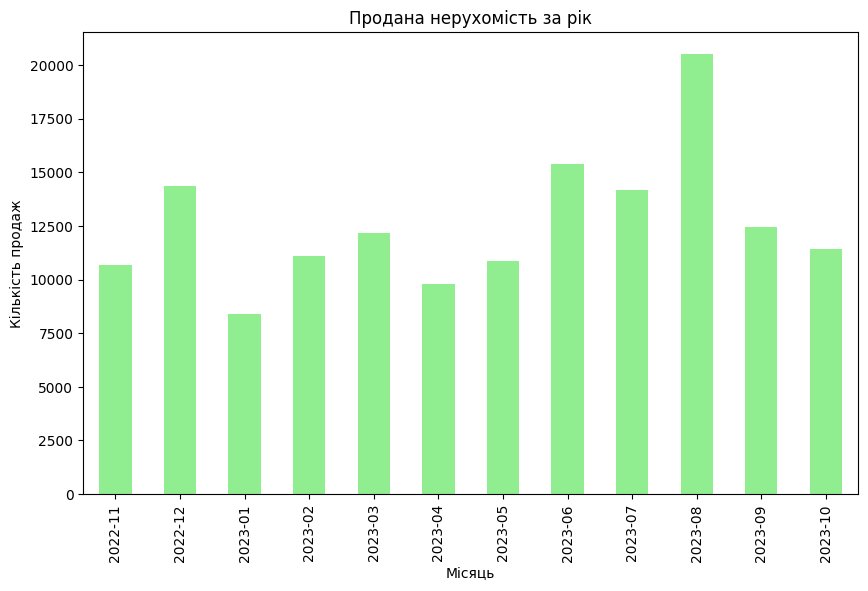

In [21]:
all_borough_data = data_upgraded[data_upgraded['BOROUGH'].isin(['Manhattan', 'Bronx', 'Brooklyn', 'Queens', 'Staten Island'])]
all_borough_data = all_borough_data[all_borough_data['TOTAL UNITS'] != '']
all_borough_data['TOTAL UNITS'] = pd.to_numeric(all_borough_data['TOTAL UNITS'], errors='coerce')
all_borough_data_filtered = all_borough_data[(all_borough_data['SALE PRICE'] > 50)]
all_borough_data_filtered['SALE MONTH'] = all_borough_data_filtered['SALE DATE'].dt.to_period('M')
units_by_month = all_borough_data_filtered.groupby('SALE MONTH')['TOTAL UNITS'].sum()
plt.figure(figsize=(10, 6))
units_by_month.plot(kind='bar', color='lightgreen')
plt.title('Продана нерухомість за рік')
plt.xlabel('Місяць')
plt.ylabel('Кількість продаж')
plt.show()

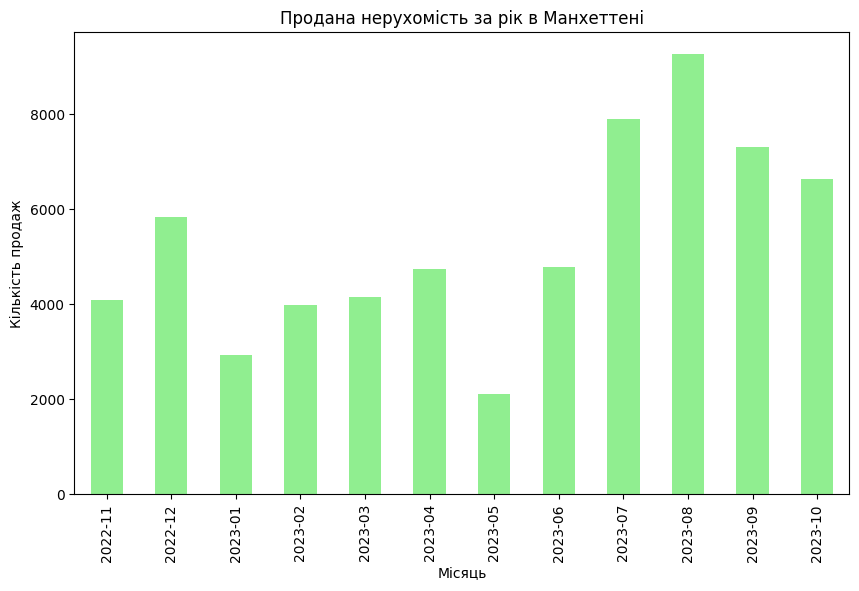

In [22]:
manhattan_about_data = manhattan_about_data[manhattan_about_data['TOTAL UNITS'] != '']
manhattan_about_data['TOTAL UNITS'] = pd.to_numeric(manhattan_about_data['TOTAL UNITS'], errors='coerce')
manhattan_about_data_filtered = manhattan_about_data[(manhattan_about_data['SALE PRICE'] > 50)]
manhattan_about_data_filtered['SALE MONTH'] = manhattan_about_data_filtered['SALE DATE'].dt.to_period('M')
units_by_month = manhattan_about_data_filtered.groupby('SALE MONTH')['TOTAL UNITS'].sum()
plt.figure(figsize=(10, 6))
units_by_month.plot(kind='bar', color='lightgreen')
plt.title('Продана нерухомість за рік в Манхеттені')
plt.xlabel('Місяць')
plt.ylabel('Кількість продаж')
plt.show()

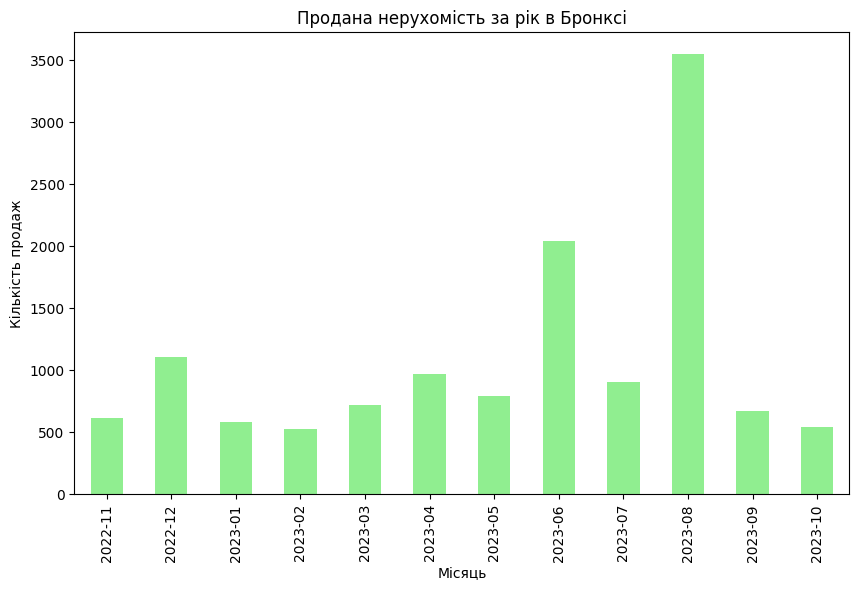

In [23]:
bronx_about_data = bronx_about_data[bronx_about_data['TOTAL UNITS'] != '']
bronx_about_data['TOTAL UNITS'] = pd.to_numeric(bronx_about_data['TOTAL UNITS'], errors='coerce')
bronx_about_data_filtered = bronx_about_data[(bronx_about_data['SALE PRICE'] > 50)]
bronx_about_data_filtered['SALE MONTH'] = bronx_about_data_filtered['SALE DATE'].dt.to_period('M')
units_by_month = bronx_about_data_filtered.groupby('SALE MONTH')['TOTAL UNITS'].sum()
plt.figure(figsize=(10, 6))
units_by_month.plot(kind='bar', color='lightgreen')
plt.title('Продана нерухомість за рік в Бронксі')
plt.xlabel('Місяць')
plt.ylabel('Кількість продаж')
plt.show()

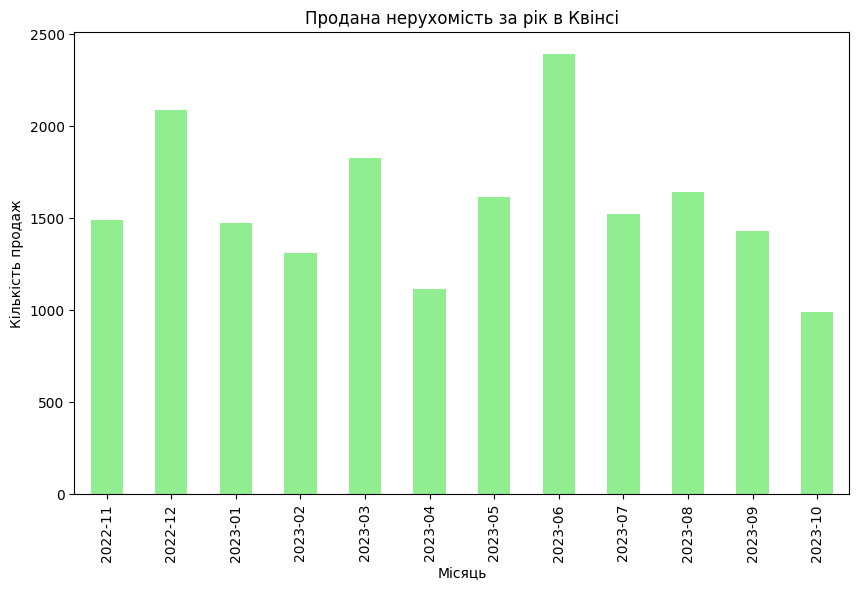

In [24]:
queens_about_data = queens_about_data[queens_about_data['TOTAL UNITS'] != '']
queens_about_data['TOTAL UNITS'] = pd.to_numeric(queens_about_data['TOTAL UNITS'], errors='coerce')
queens_about_data_filtered = queens_about_data[(queens_about_data['SALE PRICE'] > 50)]
queens_about_data_filtered['SALE MONTH'] = queens_about_data_filtered['SALE DATE'].dt.to_period('M')
units_by_month = queens_about_data_filtered.groupby('SALE MONTH')['TOTAL UNITS'].sum()
plt.figure(figsize=(10, 6))
units_by_month.plot(kind='bar', color='lightgreen')
plt.title('Продана нерухомість за рік в Квінсі')
plt.xlabel('Місяць')
plt.ylabel('Кількість продаж')
plt.show()

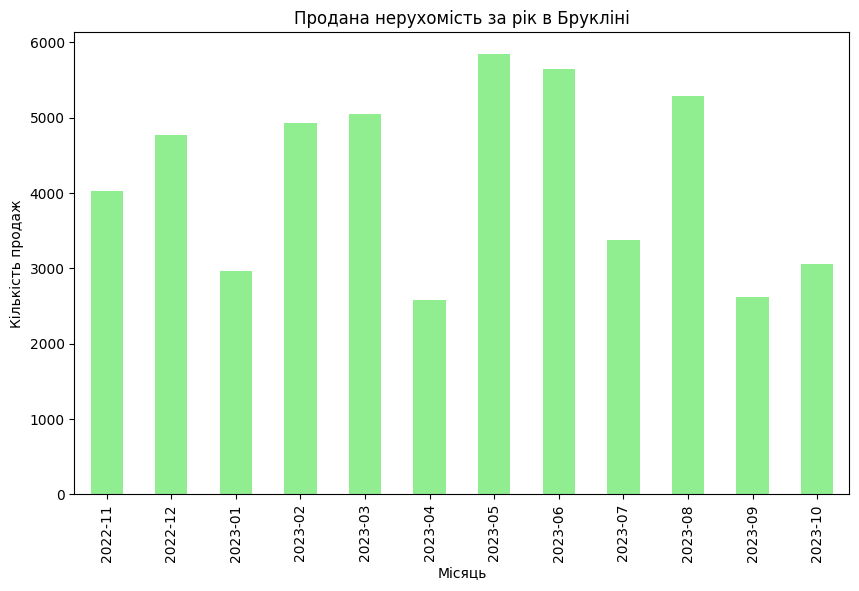

In [25]:
brooklyn_about_data = brooklyn_about_data[brooklyn_about_data['TOTAL UNITS'] != '']
brooklyn_about_data['TOTAL UNITS'] = pd.to_numeric(brooklyn_about_data['TOTAL UNITS'], errors='coerce')
brooklyn_about_data_filtered = brooklyn_about_data[(brooklyn_about_data['SALE PRICE'] > 50)]
brooklyn_about_data_filtered['SALE MONTH'] = brooklyn_about_data_filtered['SALE DATE'].dt.to_period('M')
units_by_month = brooklyn_about_data_filtered.groupby('SALE MONTH')['TOTAL UNITS'].sum()
plt.figure(figsize=(10, 6))
units_by_month.plot(kind='bar', color='lightgreen')
plt.title('Продана нерухомість за рік в Брукліні')
plt.xlabel('Місяць')
plt.ylabel('Кількість продаж')
plt.show()

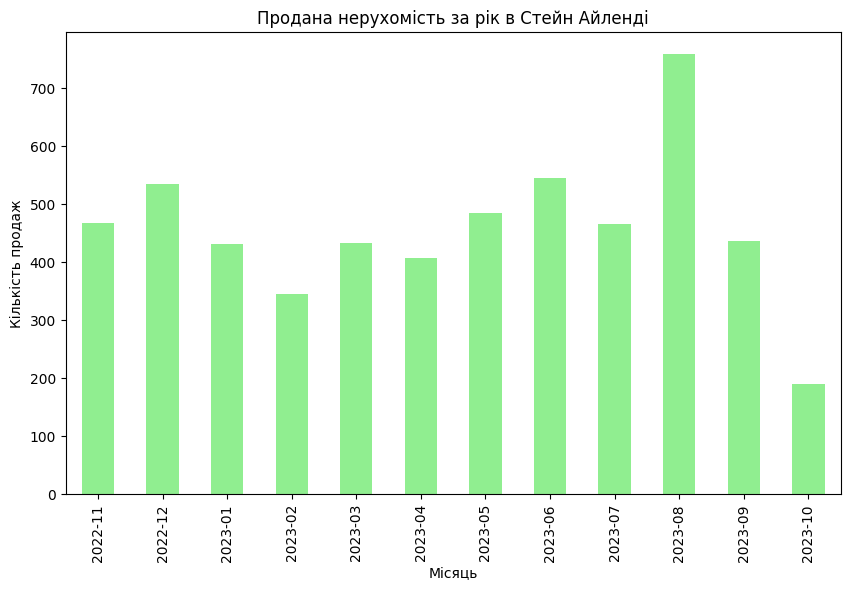

In [26]:
statenisland_about_data = statenisland_about_data[statenisland_about_data['TOTAL UNITS'] != '']
statenisland_about_data['TOTAL UNITS'] = pd.to_numeric(statenisland_about_data['TOTAL UNITS'], errors='coerce')
statenisland_about_data_filtered = statenisland_about_data[(statenisland_about_data['SALE PRICE'] > 50)]
statenisland_about_data_filtered['SALE MONTH'] = statenisland_about_data_filtered['SALE DATE'].dt.to_period('M')
units_by_month = statenisland_about_data_filtered.groupby('SALE MONTH')['TOTAL UNITS'].sum()
plt.figure(figsize=(10, 6))
units_by_month.plot(kind='bar', color='lightgreen')
plt.title('Продана нерухомість за рік в Стейн Айленді')
plt.xlabel('Місяць')
plt.ylabel('Кількість продаж')
plt.show()

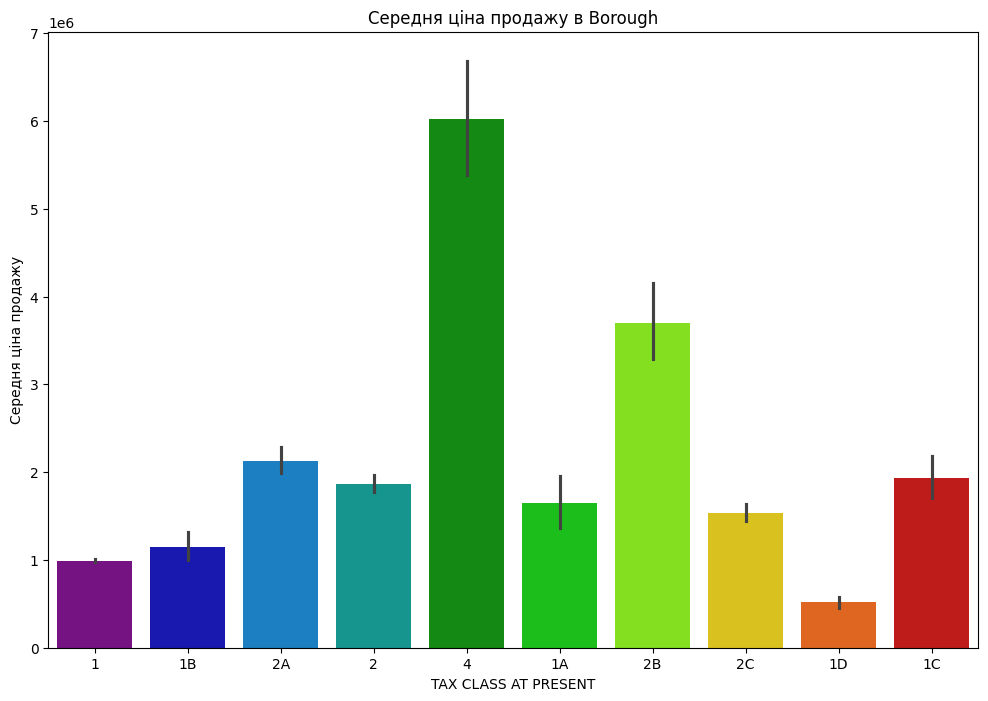

In [27]:
filtered_sale_data = data_upgraded[data_upgraded['SALE PRICE'] > 0]

plt.figure(figsize=(12, 8))
sns.barplot(x='TAX CLASS AT PRESENT', y='SALE PRICE', data=filtered_sale_data, palette='nipy_spectral')
plt.ylabel('Середня ціна продажу')
plt.title('Середня ціна продажу в Borough')
plt.show()


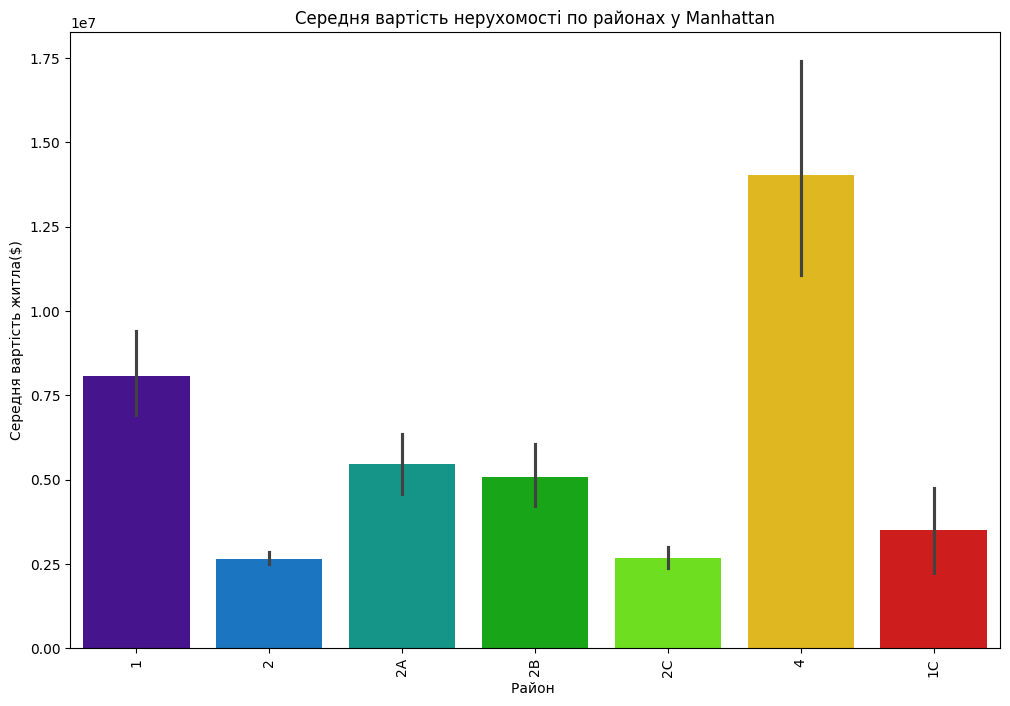

In [28]:
plt.figure(figsize=(12, 8))
sns.barplot(x='TAX CLASS AT PRESENT', y='SALE PRICE', data=manhattan_about_data, palette='nipy_spectral')
plt.title('Середня вартість нерухомості по районах у Manhattan')
plt.xlabel('Район ')
plt.ylabel('Середня вартість житла($)')
plt.xticks(rotation=90)
plt.show()

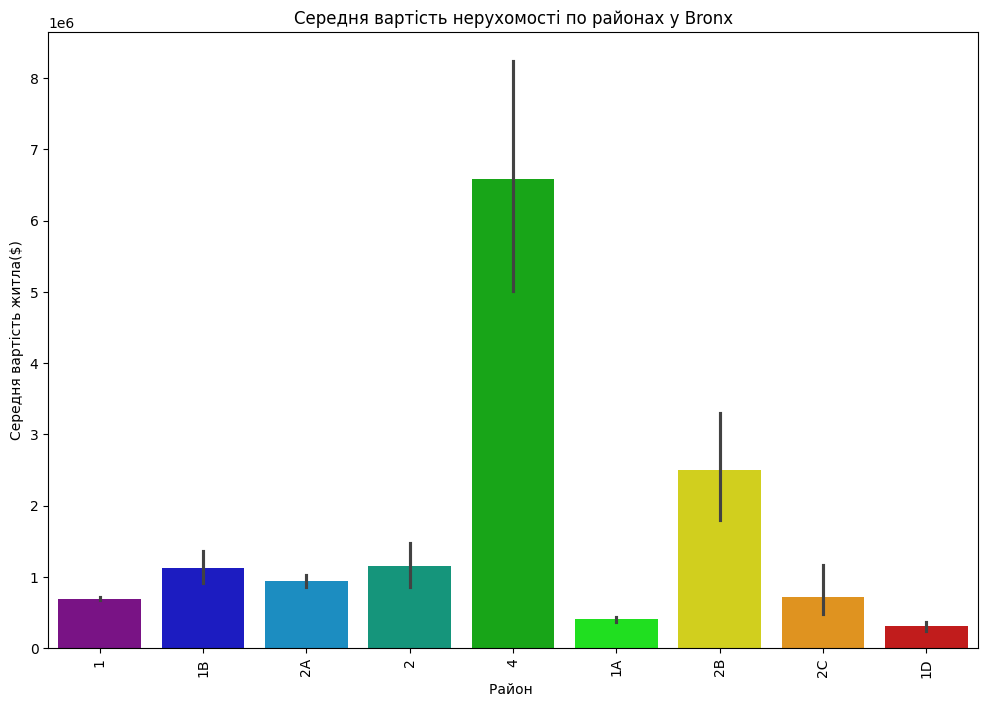

In [29]:
plt.figure(figsize=(12, 8))
sns.barplot(x='TAX CLASS AT PRESENT', y='SALE PRICE', data=bronx_about_data, palette='nipy_spectral')
plt.title('Середня вартість нерухомості по районах у Bronx')
plt.xlabel('Район ')
plt.ylabel('Середня вартість житла($)')
plt.xticks(rotation=90)
plt.show()

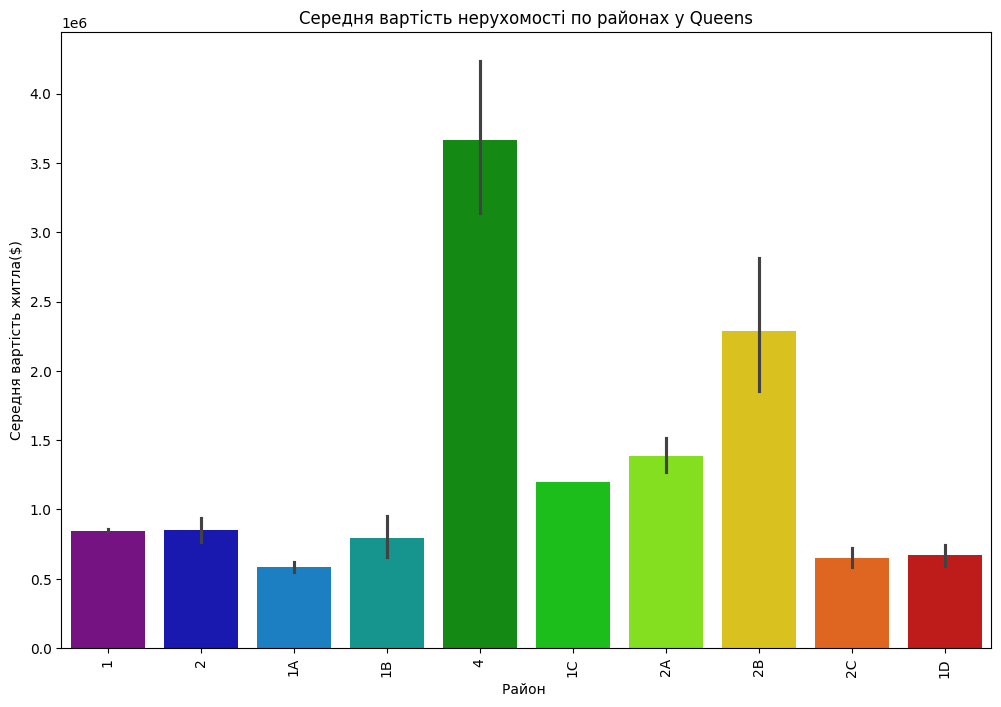

In [30]:
plt.figure(figsize=(12, 8))
sns.barplot(x='TAX CLASS AT PRESENT', y='SALE PRICE', data=queens_about_data, palette='nipy_spectral')
plt.title('Середня вартість нерухомості по районах у Queens')
plt.xlabel('Район ')
plt.ylabel('Середня вартість житла($)')
plt.xticks(rotation=90)
plt.show()

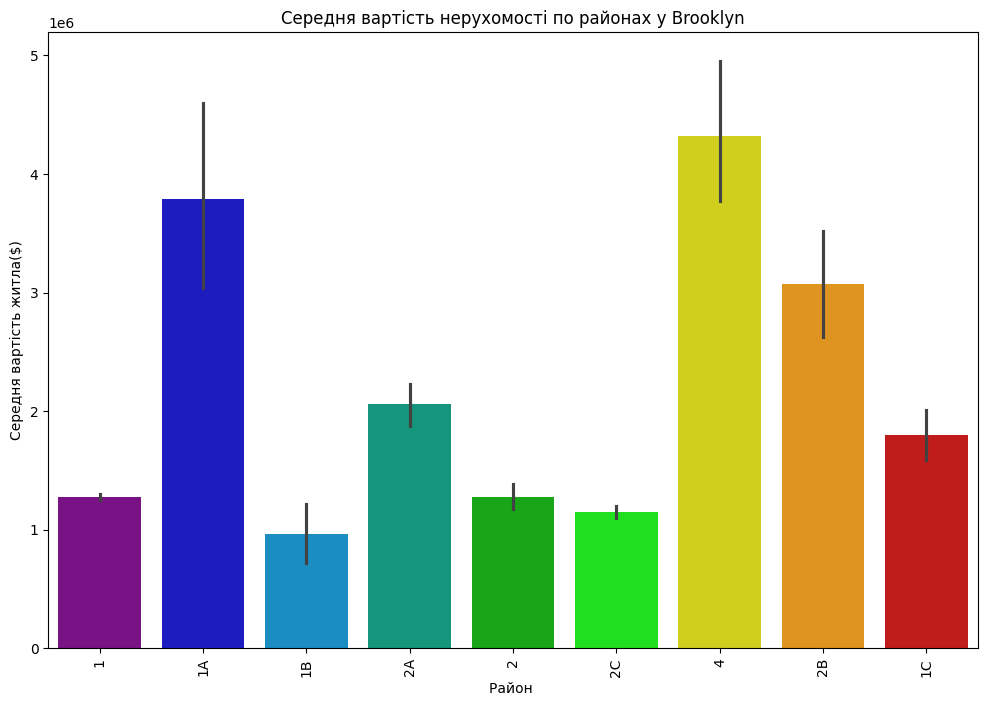

In [31]:
plt.figure(figsize=(12, 8))
sns.barplot(x='TAX CLASS AT PRESENT', y='SALE PRICE', data=brooklyn_about_data, palette='nipy_spectral')
plt.title('Середня вартість нерухомості по районах у Brooklyn')
plt.xlabel('Район ')
plt.ylabel('Середня вартість житла($)')
plt.xticks(rotation=90)
plt.show()

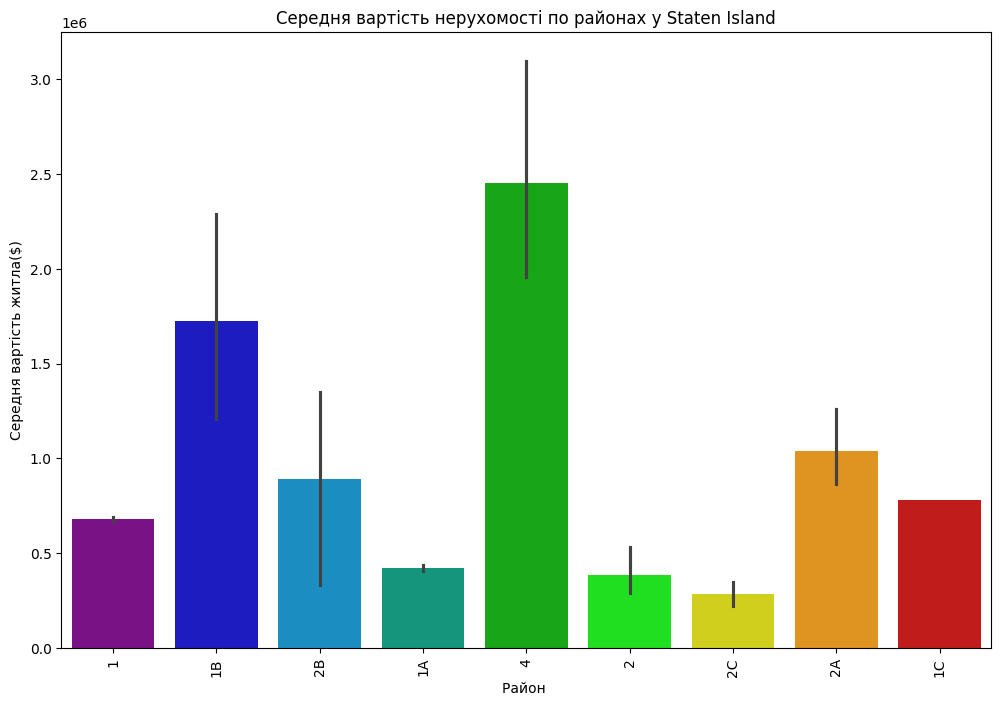

In [32]:
plt.figure(figsize=(12, 8))
sns.barplot(x='TAX CLASS AT PRESENT', y='SALE PRICE', data=statenisland_about_data, palette='nipy_spectral')
plt.title('Середня вартість нерухомості по районах у Staten Island')
plt.xlabel('Район ')
plt.ylabel('Середня вартість житла($)')
plt.xticks(rotation=90)
plt.show()

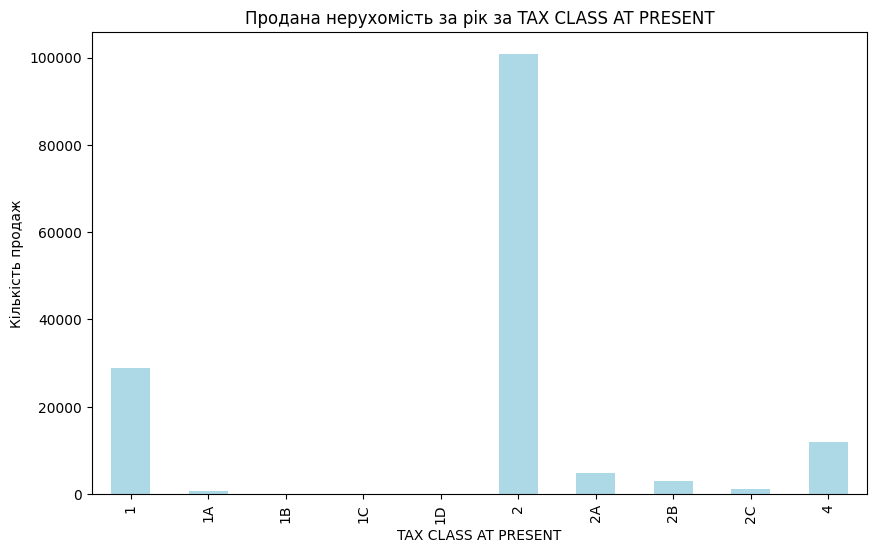

In [33]:
units_by_tax_class = all_borough_data_filtered.groupby('TAX CLASS AT PRESENT')['TOTAL UNITS'].sum()

plt.figure(figsize=(10, 6))
units_by_tax_class.plot(kind='bar', color='lightblue')
plt.title('Продана нерухомість за рік за TAX CLASS AT PRESENT')
plt.xlabel('TAX CLASS AT PRESENT')
plt.ylabel('Кількість продаж')
plt.show()

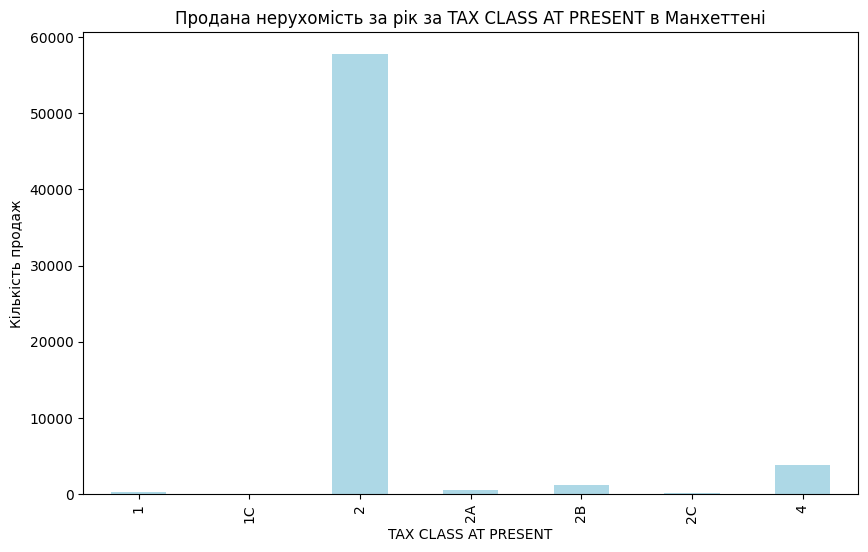

In [34]:
units_by_tax_class = manhattan_about_data_filtered.groupby('TAX CLASS AT PRESENT')['TOTAL UNITS'].sum()

plt.figure(figsize=(10, 6))
units_by_tax_class.plot(kind='bar', color='lightblue')
plt.title('Продана нерухомість за рік за TAX CLASS AT PRESENT в Манхеттені')
plt.xlabel('TAX CLASS AT PRESENT')
plt.ylabel('Кількість продаж')
plt.show()

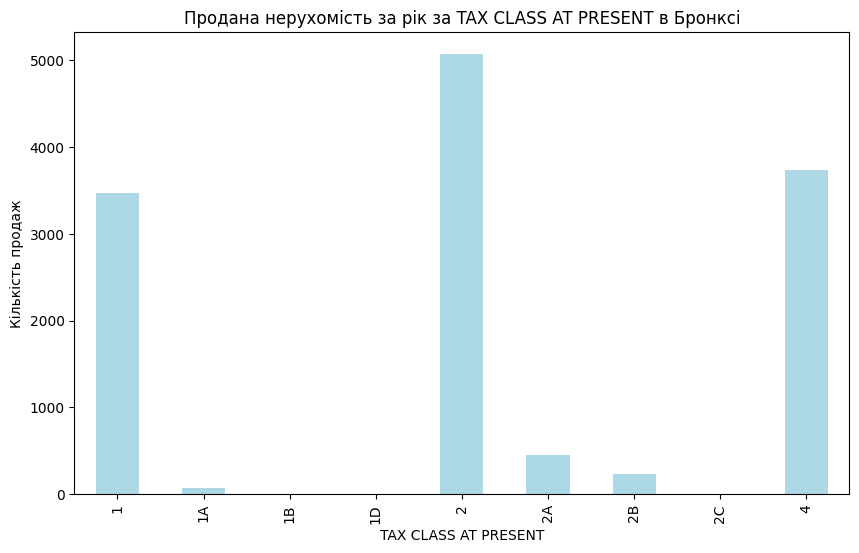

In [35]:
units_by_tax_class = bronx_about_data_filtered.groupby('TAX CLASS AT PRESENT')['TOTAL UNITS'].sum()

plt.figure(figsize=(10, 6))
units_by_tax_class.plot(kind='bar', color='lightblue')
plt.title('Продана нерухомість за рік за TAX CLASS AT PRESENT в Бронксі')
plt.xlabel('TAX CLASS AT PRESENT')
plt.ylabel('Кількість продаж')
plt.show()

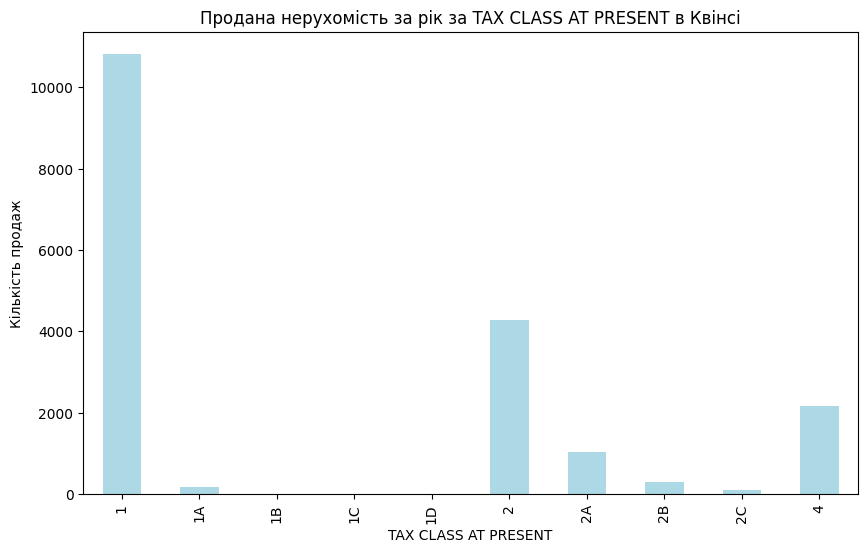

In [36]:
units_by_tax_class = queens_about_data_filtered.groupby('TAX CLASS AT PRESENT')['TOTAL UNITS'].sum()

plt.figure(figsize=(10, 6))
units_by_tax_class.plot(kind='bar', color='lightblue')
plt.title('Продана нерухомість за рік за TAX CLASS AT PRESENT в Квінсі')
plt.xlabel('TAX CLASS AT PRESENT')
plt.ylabel('Кількість продаж')
plt.show()

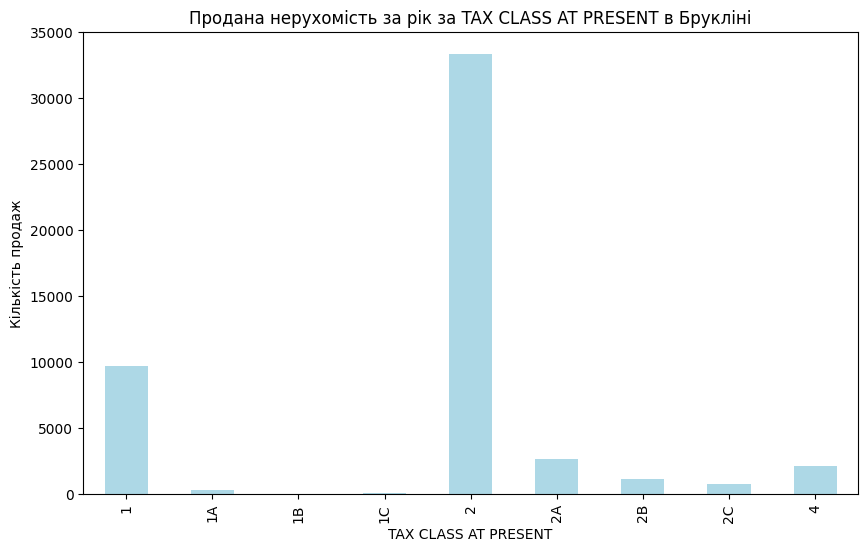

In [37]:
units_by_tax_class = brooklyn_about_data_filtered.groupby('TAX CLASS AT PRESENT')['TOTAL UNITS'].sum()

plt.figure(figsize=(10, 6))
units_by_tax_class.plot(kind='bar', color='lightblue')
plt.title('Продана нерухомість за рік за TAX CLASS AT PRESENT в Брукліні')
plt.xlabel('TAX CLASS AT PRESENT')
plt.ylabel('Кількість продаж')
plt.show()

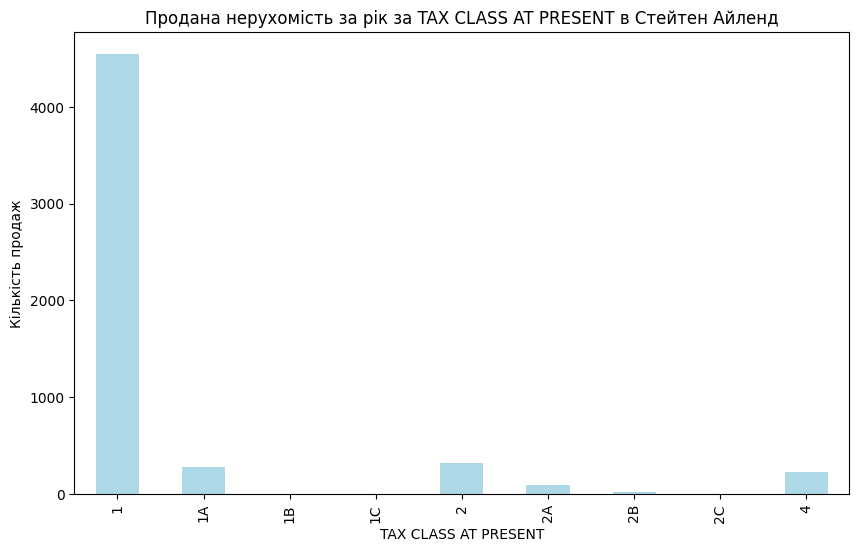

In [38]:
units_by_tax_class = statenisland_about_data_filtered.groupby('TAX CLASS AT PRESENT')['TOTAL UNITS'].sum()

plt.figure(figsize=(10, 6))
units_by_tax_class.plot(kind='bar', color='lightblue')
plt.title('Продана нерухомість за рік за TAX CLASS AT PRESENT в Стейтен Айленд')
plt.xlabel('TAX CLASS AT PRESENT')
plt.ylabel('Кількість продаж')
plt.show()

In [39]:
bins = [0, 1801, 1851, 1901, 1951, 2001, float('inf')]
labels = ['Unknown', '1801-1850', '1851-1900', '1901-1950', '1951-2000', '>2000']

data_upgraded['Year Category'] = pd.cut(data_upgraded['YEAR BUILT'], bins=bins, labels=labels, right=False)
data_upgraded


BOROUGH NEIGHBORHOOD     BUILDING CLASS CATEGORY  \
0              Bronx     BATHGATE     01 ONE FAMILY DWELLINGS   
1              Bronx     BATHGATE     01 ONE FAMILY DWELLINGS   
2              Bronx     BATHGATE     01 ONE FAMILY DWELLINGS   
3              Bronx     BATHGATE     01 ONE FAMILY DWELLINGS   
4              Bronx     BATHGATE     02 TWO FAMILY DWELLINGS   
...              ...          ...                         ...   
73300  Staten Island      WOODROW  05 TAX CLASS 1 VACANT LAND   
73301  Staten Island      WOODROW  05 TAX CLASS 1 VACANT LAND   
73302  Staten Island      WOODROW  05 TAX CLASS 1 VACANT LAND   
73303  Staten Island      WOODROW  05 TAX CLASS 1 VACANT LAND   
73304  Staten Island      WOODROW          22 STORE BUILDINGS   

      TAX CLASS AT PRESENT BUILDING CLASS AT PRESENT                ADDRESS  \
0                        1                        A1  410 EAST 179TH STREET   
1                        1                        A1       4453 PARK AVENUE   
2                        1                        A1       4453 PARK AVENUE   
3                        1                        A1    461 EAST 178 STREET   
4                        1                        B9    454 EAST 172 STREET   
...                    ...                       ...                    ...   
73300                    1                        A1     N/A LENEVAR AVENUE   
73301                    1                        A1     N/A LENEVAR AVENUE   
73302                   1B                        V0     N/A LENEVAR AVENUE   
73303                   1B                        V0      96 LENEVAR AVENUE   
73304                    4                        K2  3120 ARTHUR KILL ROAD   

          RESIDENTIAL UNITS     COMMERCIAL UNITS     TOTAL UNITS  \
0                       1.0  NO COMMERCIAL UNITS             1.0   
1                       1.0  NO COMMERCIAL UNITS             1.0   
2                       1.0  NO COMMERCIAL UNITS             1.0   
3                       1.0  NO COMMERCIAL UNITS             1.0   
4                       2.0  NO COMMERCIAL UNITS             2.0   
...                     ...                  ...             ...   
73300                   1.0  NO COMMERCIAL UNITS             1.0   
73301                   1.0  NO COMMERCIAL UNITS             1.0   
73302  NO RESIDENTIAL UNITS  NO COMMERCIAL UNITS  NO TOTAL UNITS   
73303  NO RESIDENTIAL UNITS  NO COMMERCIAL UNITS  NO TOTAL UNITS   
73304  NO RESIDENTIAL UNITS                  1.0             1.0   

      LAND SQUARE FEET          GROSS SQUARE FEET  YEAR BUILT  \
0               1842.0                     2048.0      1901.0   
1               1646.0                     1497.0      1899.0   
2               1646.0                     1497.0      1899.0   
3               1782.0                     1548.0      1899.0   
4               1658.0                     1428.0      1901.0   
...                ...                        ...         ...   
73300           2603.0  UNKNOWN GROSS SQUARE FEET      2022.0   
73301           2551.0  UNKNOWN GROSS SQUARE FEET         NaN   
73302           2597.0  UNKNOWN GROSS SQUARE FEET      2023.0   
73303           2644.0  UNKNOWN GROSS SQUARE FEET      2023.0   
73304          98116.0                     7795.0      1977.0   

       TAX CLASS AT TIME OF SALE BUILDING CLASS AT TIME OF SALE  SALE PRICE  \
0                              1                             A1      655000   
1                              1                             A1      215000   
2                              1                             A1      570000   
3                              1                             A1           0   
4                              1                             B9      350000   
...                          ...                            ...         ...   
73300                          1                             V0     1116638   
73301                          1                     

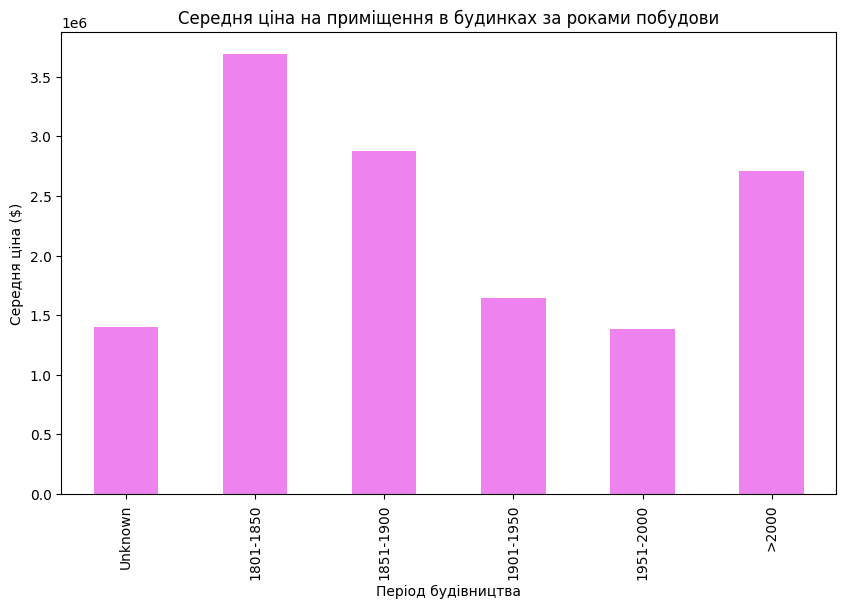

In [40]:
data_upgraded_filtered = data_upgraded[data_upgraded['SALE PRICE'] > 50]
avg_price_by_time_period = data_upgraded_filtered.groupby('Year Category')['SALE PRICE'].mean().sort_index()

plt.figure(figsize=(10, 6))
avg_price_by_time_period.plot(kind='bar', color='violet')
plt.title('Середня ціна на приміщення в будинках за роками побудови')
plt.xlabel('Період будівництва')
plt.ylabel('Середня ціна ($)')
plt.show()

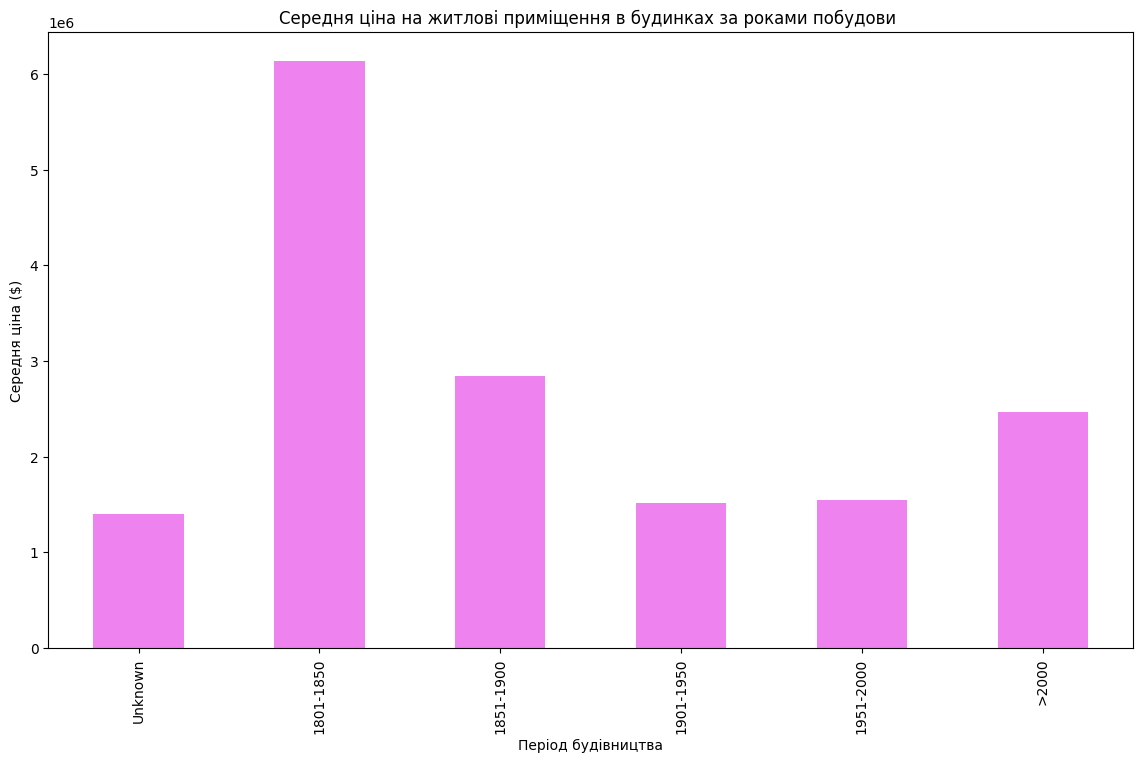

In [41]:
data_upgraded['RESIDENTIAL UNITS'] = pd.to_numeric(data_upgraded['RESIDENTIAL UNITS'], errors='coerce').astype('Int64')
data_upgraded_filtered = data_upgraded[(data_upgraded['SALE PRICE'] > 50) & (data_upgraded['RESIDENTIAL UNITS'] > 0)]
avg_price_by_time_period = data_upgraded_filtered.groupby('Year Category')['SALE PRICE'].mean().sort_index()
plt.figure(figsize=(14, 8))
avg_price_by_time_period.plot(kind='bar', color='violet')
plt.title('Середня ціна на житлові приміщення в будинках за роками побудови ')
plt.xlabel('Період будівництва')
plt.ylabel('Середня ціна ($)')

plt.show()

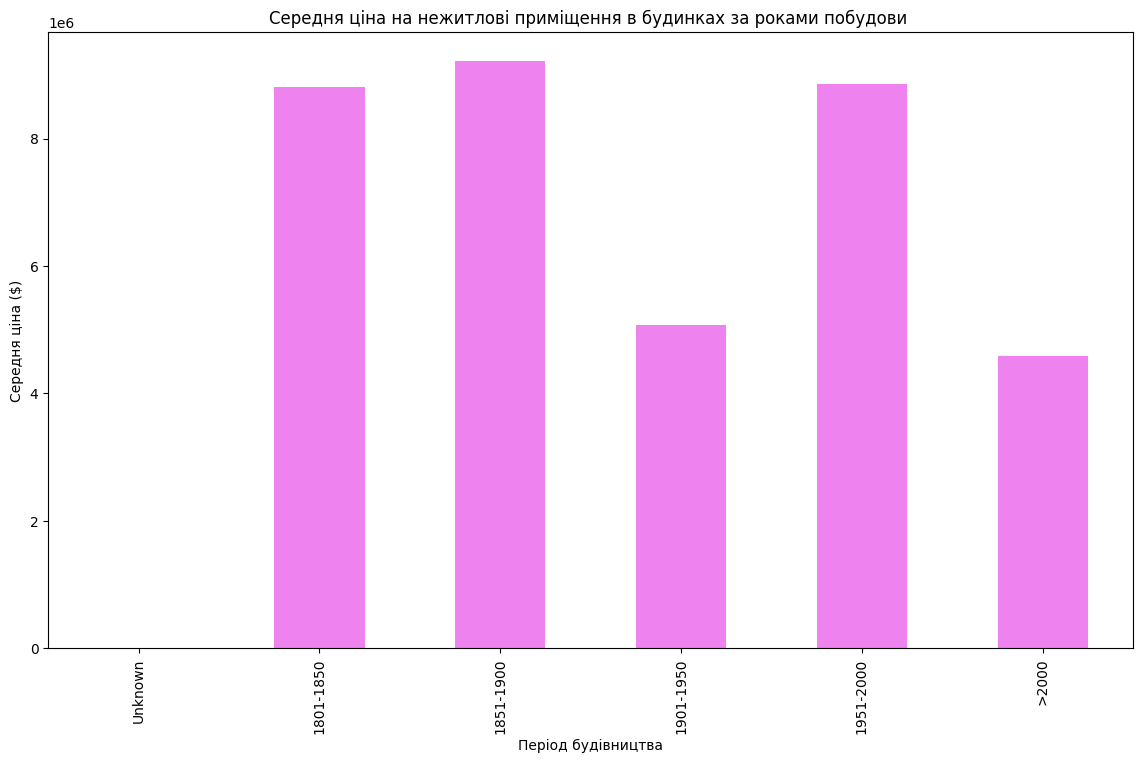

In [43]:
data_upgraded['RESIDENTIAL UNITS'] = pd.to_numeric(data_upgraded['COMMERCIAL UNITS'], errors='coerce').astype('Int64')
data_upgraded_filtered = data_upgraded[(data_upgraded['SALE PRICE'] > 50) & (data_upgraded['RESIDENTIAL UNITS'] > 0)]
avg_price_by_time_period = data_upgraded_filtered.groupby('Year Category')['SALE PRICE'].mean().sort_index()
plt.figure(figsize=(14, 8))
avg_price_by_time_period.plot(kind='bar', color='violet')
plt.title('Середня ціна на нежитлові приміщення в будинках за роками побудови ')
plt.xlabel('Період будівництва')
plt.ylabel('Середня ціна ($)')

plt.show()